In [1]:
from merra2_assistant.main import load_merra2_sample, get_subregion
import yt 
import numpy as np

In [2]:
bbox_dict = {'altitude':[0, 68*1e3], 
             'latitude': [25, 75],
             'longitude': [-150., -100.]}
dsx0, ds_yt = load_merra2_sample(bbox_dict=bbox_dict, 
                                 virtual_alt_scale=50., 
                                 grid_resolution = (16,)*3,
                                 refine_max_iters=2000,
                                 refine_min_grid_size=4,
                                 refine_by=8,
                                 fill_value = 0.0)
dsx0_sub = get_subregion(dsx0, bbox_dict)

yt_xarray : [INFO ] 2024-05-01 15:36:00,625:  Creating image mask for grid decomposition.
yt_xarray : [INFO ] 2024-05-01 15:36:01,056:  Decomposing image mask and building yt dataset.
yt_xarray : [INFO ] 2024-05-01 15:36:01,075:  Decomposed into 219 grids after 269 iterations.
yt : [INFO     ] 2024-05-01 15:36:01,142 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-05-01 15:36:01,143 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2024-05-01 15:36:01,143 Parameters: domain_left_edge          = [-7669117. -8720998.  2692500.]
yt : [INFO     ] 2024-05-01 15:36:01,144 Parameters: domain_right_edge         = [-286334. -824468. 9438062.]
yt : [INFO     ] 2024-05-01 15:36:01,144 Parameters: cosmological_simulation   = 0


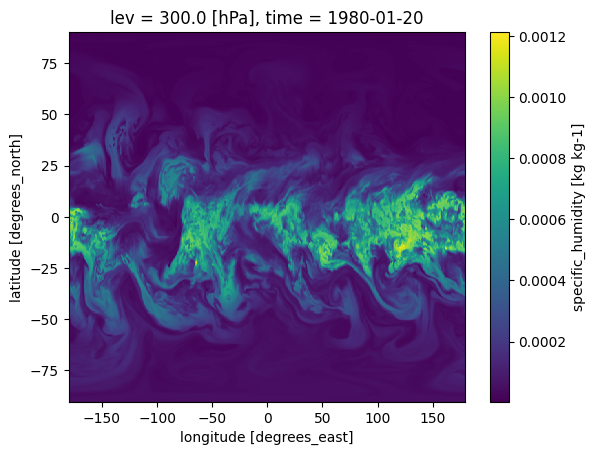

In [3]:
dsx0.QV.isel({'lev':20}).plot()

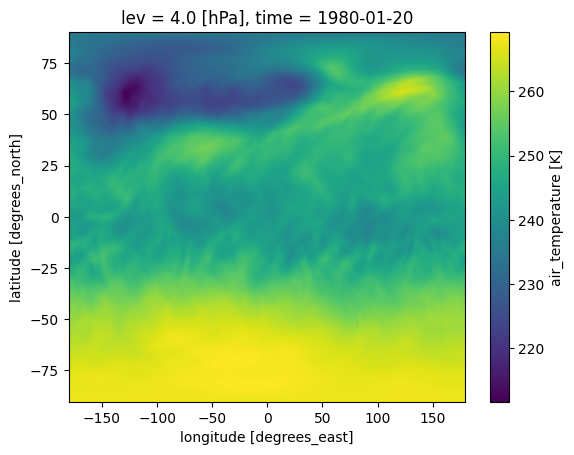

In [4]:
dsx0.T.isel({'lev':33}).plot()

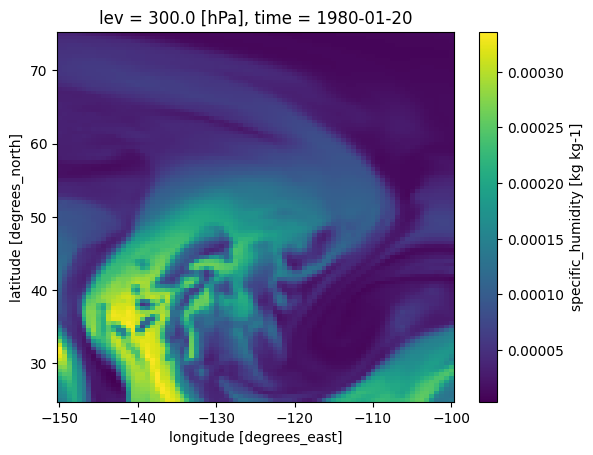

In [5]:
dsx0_sub.QV.isel({'lev':20}).plot()

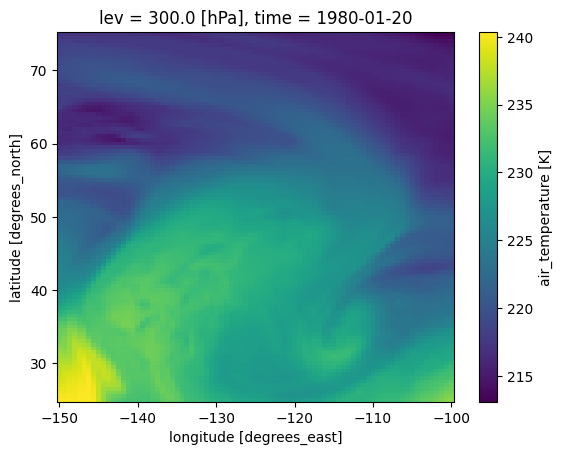

In [6]:
dsx0_sub.T.isel({'lev':20}).plot()

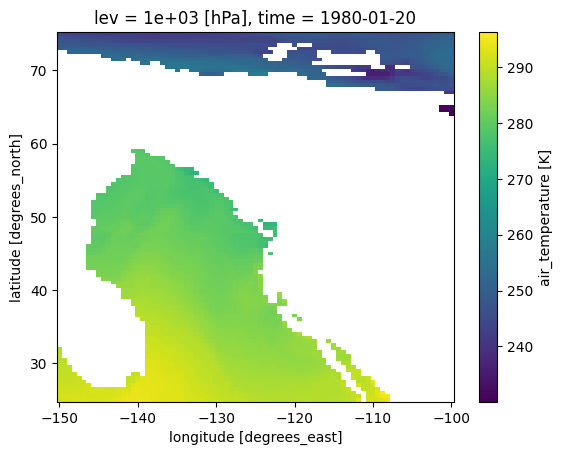

In [7]:
dsx0_sub.T.isel({'lev':0}).plot()

yt : [INFO     ] 2024-05-01 15:36:02,874 xlim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:02,874 ylim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:02,877 xlim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:02,878 ylim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:02,881 Making a fixed resolution buffer of (('stream', 'T_by_alt')) 800 by 800



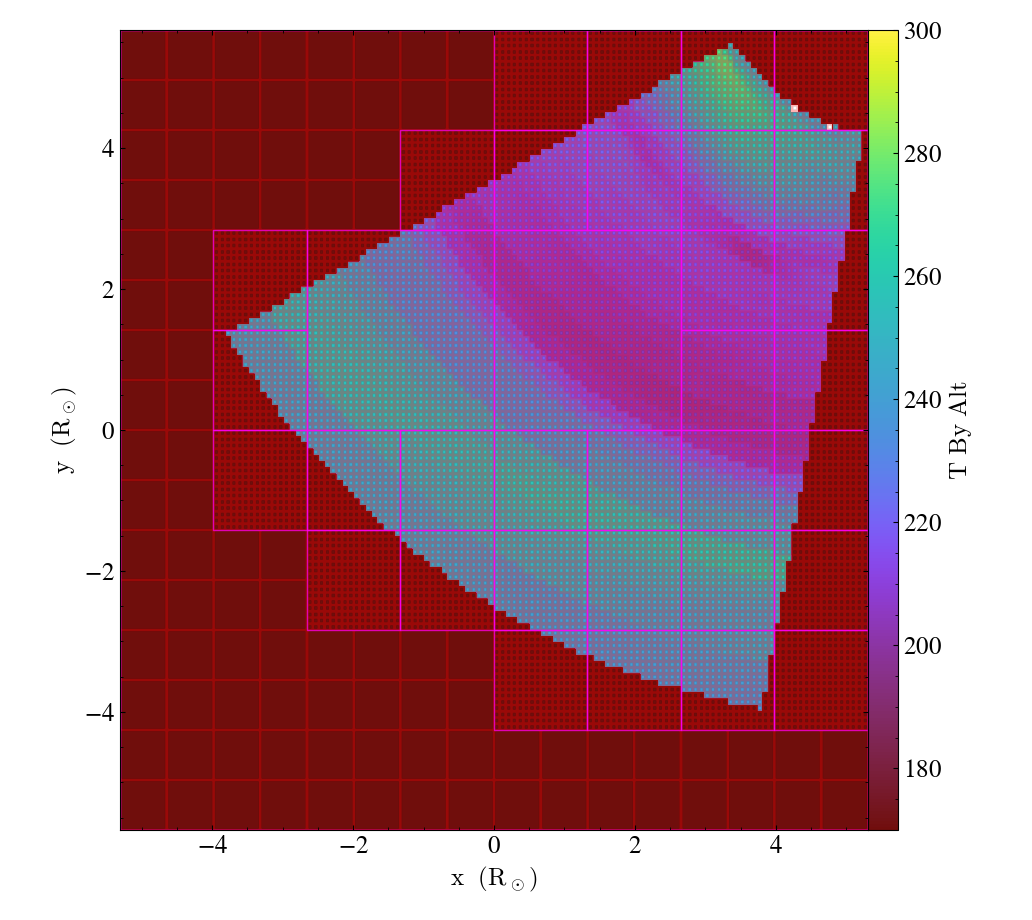

In [8]:
slc = yt.SlicePlot(ds_yt, 'z', 'T_by_alt')
slc.set_log('T_by_alt', False)
slc.annotate_cell_edges(color=(1,0,0), alpha=0.3)
slc.annotate_grids(edgecolors=(1,0,1,1))
slc.render()
axs = slc.plots['T_by_alt'].figure.axes
axs[0].set_axis_off()
slc.set_zlim('T_by_alt', 170, 300)
slc.show()

yt : [INFO     ] 2024-05-01 15:36:03,818 xlim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:03,819 ylim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:36:03,821 xlim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:03,821 ylim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:36:03,822 Making a fixed resolution buffer of (('stream', 'T_by_alt')) 400 by 400



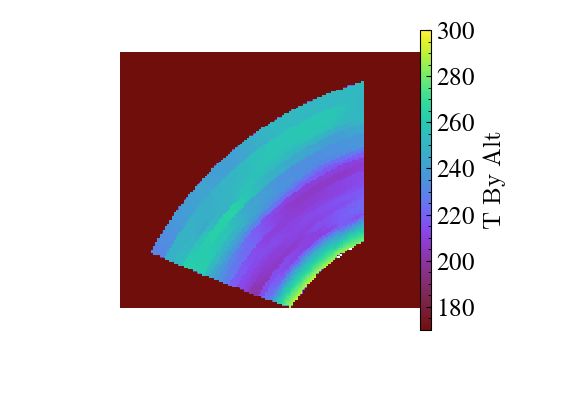

yt : [INFO     ] 2024-05-01 15:36:04,246 xlim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:36:04,247 ylim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:04,249 xlim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:36:04,249 ylim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:04,250 Making a fixed resolution buffer of (('stream', 'T_by_alt')) 400 by 400



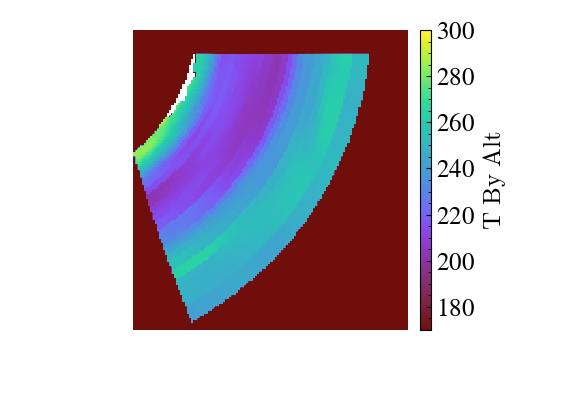

yt : [INFO     ] 2024-05-01 15:36:04,569 xlim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:04,569 ylim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:04,571 xlim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:04,572 ylim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:04,572 Making a fixed resolution buffer of (('stream', 'T_by_alt')) 400 by 400



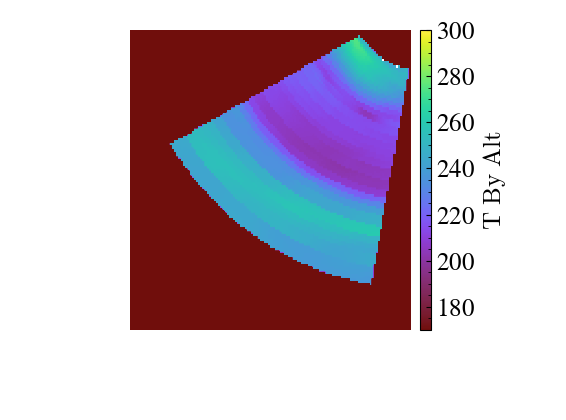

In [9]:
for dim in 'xyz':
    slc = yt.SlicePlot(ds_yt, dim, 'T_by_alt', window_size=(3,3), buff_size=(400,400))    
    slc.set_log('T_by_alt', False)
    slc.set_zlim('T_by_alt', 170, 300)
    slc.render()
    axs = slc.plots['T_by_alt'].figure.axes
    axs[0].set_axis_off()    
    slc.show()

yt : [INFO     ] 2024-05-01 15:36:04,913 xlim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:04,914 ylim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:36:04,916 xlim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:04,916 ylim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:36:04,917 Making a fixed resolution buffer of (('stream', 'QV_n')) 400 by 400



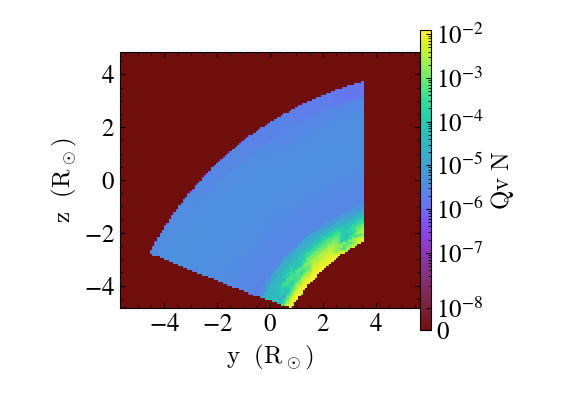

yt : [INFO     ] 2024-05-01 15:36:05,416 xlim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:36:05,416 ylim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:05,418 xlim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:36:05,418 ylim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:05,419 Making a fixed resolution buffer of (('stream', 'QV_n')) 400 by 400



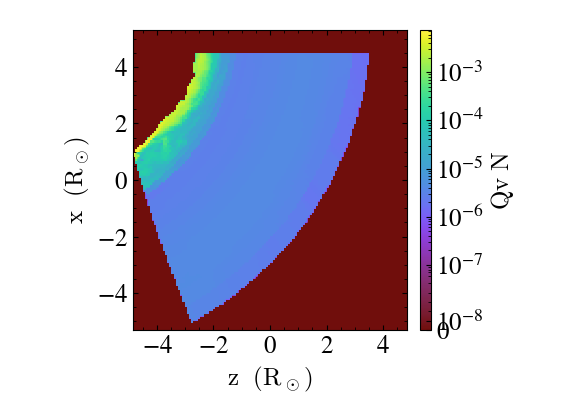

yt : [INFO     ] 2024-05-01 15:36:05,966 xlim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:05,966 ylim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:05,968 xlim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:36:05,969 ylim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:36:05,970 Making a fixed resolution buffer of (('stream', 'QV_n')) 400 by 400



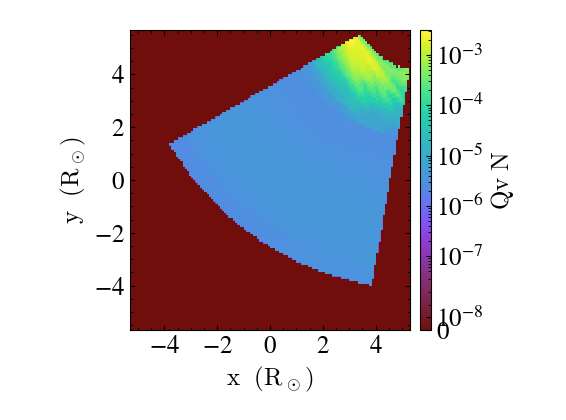

In [10]:
for dim in 'xyz':
    slc = yt.SlicePlot(ds_yt, dim, 'QV_n', window_size=(3,3), buff_size=(400,400))
    # slc.set_log('QV_by_alt', True)
    # slc.render()
    # axs = slc.plots['QV_by_alt'].figure.axes
    # axs[0].set_axis_off()
    slc.show()


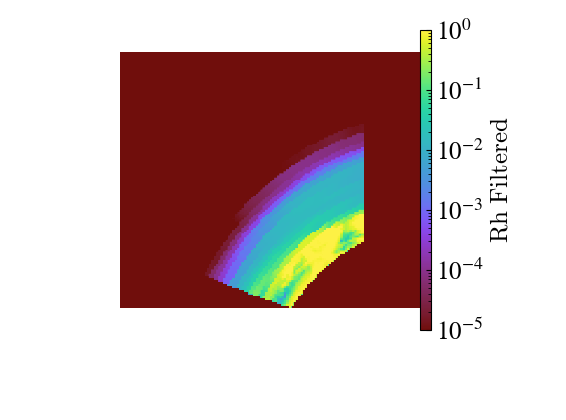


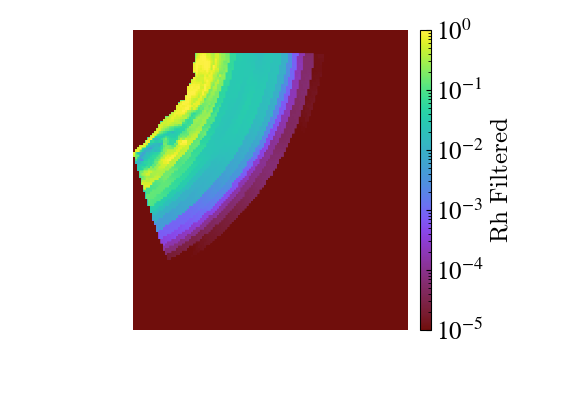


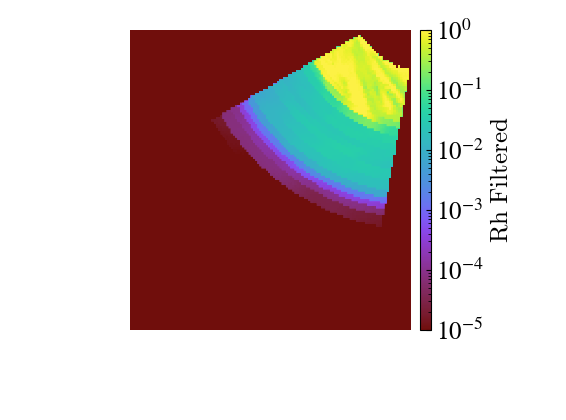

In [41]:
for dim in 'xyz':
    slc = yt.SlicePlot(ds_yt, dim, 'RH_filtered', window_size=(3,3), buff_size=(400,400))    
    # slc.set_log('T_by_alt', False)
    slc.set_zlim('RH_filtered', 1e-5, 1)
    slc.render()
    axs = slc.plots['RH_filtered'].figure.axes
    axs[0].set_axis_off()    
    slc.show()

yt : [INFO     ] 2024-05-01 15:19:02,583 xlim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:19:02,584 ylim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:19:02,585 xlim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:19:02,586 ylim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:19:02,587 Making a fixed resolution buffer of (('stream', 'dQV_n')) 400 by 400



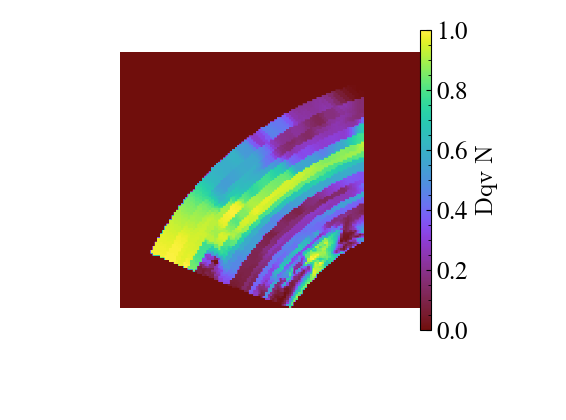

yt : [INFO     ] 2024-05-01 15:19:03,176 xlim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:19:03,177 ylim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:19:03,179 xlim = 2692500.000000 9438062.000000
yt : [INFO     ] 2024-05-01 15:19:03,179 ylim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:19:03,180 Making a fixed resolution buffer of (('stream', 'dQV_n')) 400 by 400



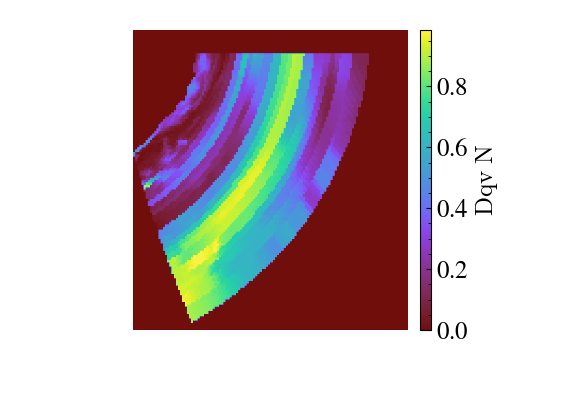

yt : [INFO     ] 2024-05-01 15:19:03,709 xlim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:19:03,710 ylim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:19:03,711 xlim = -7669117.000000 -286334.000000
yt : [INFO     ] 2024-05-01 15:19:03,712 ylim = -8720998.000000 -824468.000000
yt : [INFO     ] 2024-05-01 15:19:03,713 Making a fixed resolution buffer of (('stream', 'dQV_n')) 400 by 400



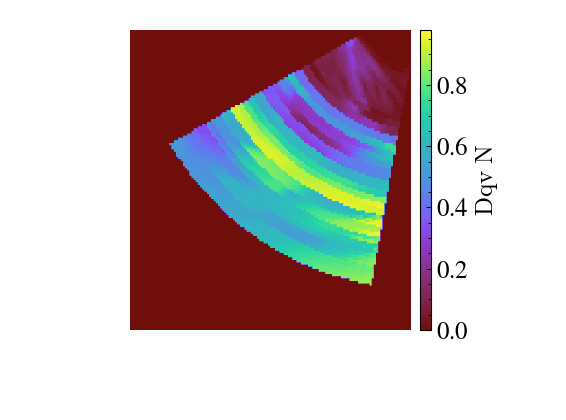

In [53]:
for dim in 'xyz':
    slc = yt.SlicePlot(ds_yt, dim, 'dQV_n', window_size=(3,3), buff_size=(400,400))
    slc.set_log('dQV_n', False)
    slc.render()
    axs = slc.plots['dQV_n'].figure.axes
    axs[0].set_axis_off()
    slc.show()

In [54]:
ad = ds_yt.all_data()
qad = ad['QV_max_by_alt']

In [55]:
qad.min(), qad.max()

(unyt_quantity(0., '(dimensionless)'),
 unyt_quantity(0.01425179, '(dimensionless)'))

In [56]:
ad['QV_min_by_alt'].max()

unyt_quantity(0.00027886, '(dimensionless)')

In [82]:
fld = ('stream', 'dQV_n')
sc = yt.create_scene(ds_yt, lens_type="perspective", field=fld)

source = sc[0]

source.set_field(fld)
source.set_log(False)

bounds = (0, 1.0)

# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(bounds)

tf.sample_colormap(.6, w=0.0005, colormap="cmyt.arbre")
tf.sample_colormap(.4, w=0.0005, colormap="cmyt.arbre")
tf.sample_colormap(.9, w=0.0005, colormap="cmyt.arbre")

source.tfh.tf = tf
source.tfh.bounds = bounds

source.tfh.plot("volume_rendering_images/transfer_function.png", profile_field=fld)

sc.camera.north_vector = ds_yt.domain_center.d
sc.camera.set_focus(sc.camera.focus)
sc.camera.zoom(0.6)

sc.save("volume_rendering_images/rendering0000.png", sigma_clip=4)

yt : [WARNING  ] 2024-05-01 15:29:20,402 No previously rendered image found, rendering now.
yt : [INFO     ] 2024-05-01 15:29:20,402 Rendering scene (Can take a while).
yt : [INFO     ] 2024-05-01 15:29:20,403 Creating volume
yt : [INFO     ] 2024-05-01 15:29:22,531 Saving rendered image to volume_rendering_images/rendering0000.png


In [83]:
yt.set_log_level(50)
nframes = 100
total_rot = 360 
drot = total_rot / nframes
for irlot in range(nframes):
    sc.camera.rotate(drot*np.pi/180, rot_center=sc.camera.focus)
    sc.save(f"volume_rendering_images/rendering{str(irlot+1).zfill(4)}.png", sigma_clip=4)

yt : [WARNING  ] 2024-05-01 15:29:22,629 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2024-05-01 15:29:22,630 Rendering scene (Can take a while).
yt : [INFO     ] 2024-05-01 15:29:24,218 Saving rendered image to volume_rendering_images/rendering0001.png
yt : [WARNING  ] 2024-05-01 15:29:24,299 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2024-05-01 15:29:24,300 Rendering scene (Can take a while).
yt : [INFO     ] 2024-05-01 15:29:26,153 Saving rendered image to volume_rendering_images/rendering0002.png
yt : [WARNING  ] 2024-05-01 15:29:26,244 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2024-05-01 15:29:26,245 Rendering scene (Can take a while).
yt : [INFO     ] 2024-05-01 15:29:27,721 Saving rendered image t

In [40]:
fld = ('stream', 'RH_filtered')
sc = yt.create_scene(ds_yt, lens_type="perspective", field=fld)

source = sc[0]

source.set_field(fld)

# Set transfer function properties
source.tfh.set_bounds((1e-4, 1))
source.tfh.set_log(True)
source.tfh.grey_opacity = False


source.tfh.plot("volume_rendering_images/RH_transfer_function.png", profile_field=fld)


sc.camera.north_vector = ds_yt.domain_center.d
sc.camera.set_focus(sc.camera.focus)
sc.camera.zoom(0.6)


# sc.camera.north_vector = ds_yt.domain_center.d
# # n_vec = ds_yt.domain_center.d/np.linalg.norm(ds_yt.domain_center.d)
# # new_foc = -.2 * n_vec + sc.camera.focus.d
# sc.camera.set_focus(sc.camera.focus)
# sc.camera.zoom(0.4)
# new_pos = sc.camera.position - ds_yt.arr([0,0, 30*1e5], 'code_length')
# sc.camera.set_position(new_pos)
sc.save("volume_rendering_images/RH_rendering0000.png", sigma_clip=3.5)

In [39]:
yt.set_log_level(50)
nframes = 10
total_rot = 360 
drot = total_rot / nframes
for irlot in range(nframes):
    sc.camera.rotate(drot*np.pi/180, rot_center=ds_yt.domain_center)
    sc.save(f"volume_rendering_images/RH_rendering{str(irlot+1).zfill(4)}.png", sigma_clip=4)

(array([5.33850e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        2.57938e+05, 5.86370e+04, 4.31180e+04, 1.15687e+05, 9.04490e+04]),
 array([-1.20000000e+01, -1.07995738e+01, -9.59914751e+00, -8.39872126e+00,
        -7.19829501e+00, -5.99786877e+00, -4.79744252e+00, -3.59701627e+00,
        -2.39659003e+00, -1.19616378e+00,  4.26246870e-03]),
 <BarContainer object of 10 artists>)

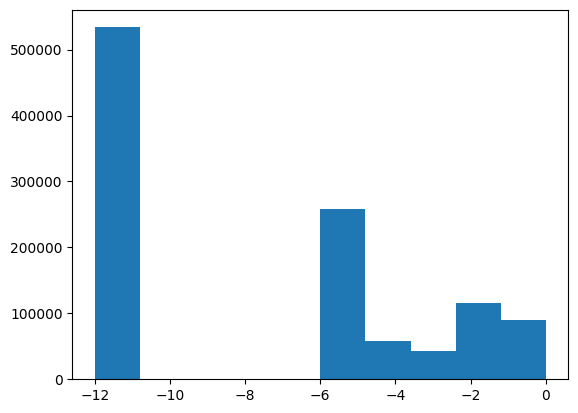

In [42]:
import matplotlib.pyplot as plt 
import numpy as np
ad = ds_yt.all_data()['RH_filtered']
plt.hist(np.log10(ad))